In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import ticker as mticker
%matplotlib inline
# params = {"text.usetex": True,
#           "font.family": "serif",
#           "font.serif": ["Computer Modern Serif"]}
# plt.rcParams.update(params)


In [2]:
totalECF_demo = pd.read_csv(
    '../../../../CEEPR/DoingTheDirtyWork/Analysis/iraComparison/Temp/ira_counties_ecf.csv',
    index_col=0,
    dtype={'FIPS': str, 'FIPSTATE': str}
    )
for col in totalECF_demo.columns:
    print(col)

FIPS
County
FIPSTATE
State
NERC
rho_eff_min
rho_eff_max
rho_eff_avg
burden_min
burden_max
burden_avg
tonCO2e_eff_min
tonCO2e_eff_max
tonCO2e_eff_avg
tonCO2e_eff_min_emp
burden_min_emp
tonCO2e_eff_max_emp
burden_max_emp
tonCO2e_eff_avg_emp
burden_avg_emp
tonCO2e_eff_min_log10
tonCO2e_eff_percapita_min
tonCO2e_eff_percapita_min_log10
lbCO2e_eff_percapita_min
lbCO2e_eff_percapita_min_log10
tonCO2e_eff_peremp_min
tonCO2e_eff_peremp_min_log10
burden_min_log10
burden_percapita_min
burden_percapita_min_log10
burden_peremp_min
burden_peremp_min_log10
tonCO2e_eff_max_log10
tonCO2e_eff_percapita_max
tonCO2e_eff_percapita_max_log10
lbCO2e_eff_percapita_max
lbCO2e_eff_percapita_max_log10
tonCO2e_eff_peremp_max
tonCO2e_eff_peremp_max_log10
burden_max_log10
burden_percapita_max
burden_percapita_max_log10
burden_peremp_max
burden_peremp_max_log10
tonCO2e_eff_avg_log10
tonCO2e_eff_percapita_avg
tonCO2e_eff_percapita_avg_log10
lbCO2e_eff_percapita_avg
lbCO2e_eff_percapita_avg_log10
ECF
ECF_log10
burden

## 2.1 Prepare mapping dataframe


In [3]:
# Load in a GeoJSON file containing the geometry information for US counties, where feature.id is a FIPS code.
from urllib.request import urlopen
import json
import geopandas

with urlopen("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json") as response:
    counties = json.load(response)

# Create geodataframe from the same file
counties_gdf = geopandas.read_file("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json")

In [4]:
df = totalECF_demo[['FIPS']].merge(
    counties_gdf.id,
    how='outer',
    left_on='FIPS',
    right_on='id'
)
df[(df.FIPS.isna()) | (df.id.isna())]

,FIPS,id
80,02158,NaN
86,02201,NaN
88,02232,NaN
91,02280,NaN
2409,46102,NaN
...,...,...
3221,NaN,72141
3222,NaN,72071
3223,NaN,72003
3224,NaN,72009


In [16]:
for col in totalECF_demo.columns:
    print(col)

FIPS
County
FIPSTATE
State
NERC
rho_eff_min
rho_eff_max
rho_eff_avg
burden_min
burden_max
burden_avg
tonCO2e_eff_min
tonCO2e_eff_max
tonCO2e_eff_avg
tonCO2e_eff_min_emp
burden_min_emp
tonCO2e_eff_max_emp
burden_max_emp
tonCO2e_eff_avg_emp
burden_avg_emp
tonCO2e_eff_min_log10
tonCO2e_eff_percapita_min
tonCO2e_eff_percapita_min_log10
lbCO2e_eff_percapita_min
lbCO2e_eff_percapita_min_log10
tonCO2e_eff_peremp_min
tonCO2e_eff_peremp_min_log10
burden_min_log10
burden_percapita_min
burden_percapita_min_log10
burden_peremp_min
burden_peremp_min_log10
tonCO2e_eff_max_log10
tonCO2e_eff_percapita_max
tonCO2e_eff_percapita_max_log10
lbCO2e_eff_percapita_max
lbCO2e_eff_percapita_max_log10
tonCO2e_eff_peremp_max
tonCO2e_eff_peremp_max_log10
burden_max_log10
burden_percapita_max
burden_percapita_max_log10
burden_peremp_max
burden_peremp_max_log10
tonCO2e_eff_avg_log10
tonCO2e_eff_percapita_avg
tonCO2e_eff_percapita_avg_log10
lbCO2e_eff_percapita_avg
lbCO2e_eff_percapita_avg_log10
ECF
ECF_log10
burden

In [67]:
pd.DataFrame(totalECF_demo_tool.loc[0, [race for race in
         ['Black', 'Native American', 'Asian', 'Hawaiian/Pac. Islander', 'Other']
         if race != totalECF_demo_tool.loc[0, 'top_race']]]).T.astype(float)#.idxmax(axis='columns')

,Native American,Asian,Hawaiian/Pac. Islander,Other
0,447.0,1048.0,24.0,720.0


In [84]:
# Filter out necessary columns for mapping dataframe
from shapely.geometry.collection import GeometryCollection
totalECF_demo_tool = totalECF_demo[
    ['FIPS', 'County', 'FIPSTATE', 'State',
     'ECF', 'ECF_log10',
     'Emp', 'POP', 'POP_log10', 'MIG_TOT', 'MIG_TOT_log10',
     'MIG_PERCENT', 'UNEMP_RATE', 'POV_RATE', 'INC_IND_TOT',
     'ED_PERCENT_TERTIARY', 'pop_per_sqmi', 'pop_per_sqmi_log10',
     'county_preferred_party', 'RUCC_2013',
     'county_percent_D', 'county_percent_R', 'ETHN_LATIN',
     'RACE_WHITE', 'RACE_BLACK', 'RACE_NATAMERICAN', 'RACE_ASIAN',
     'RACE_HAWAII_PACISLAND', 'RACE_OTHER', 'RACE_PERCENT_MINORITY',
     'RACE_PERCENT_MINORITY_log10', 'ira', 'ira_ffe', 'ira_coal'
     ]
]
totalECF_demo_tool['MIG_TOT_log10'] = totalECF_demo_tool.apply(
    lambda x: 0 if x.MIG_TOT_log10 == -np.infty else x.MIG_TOT_log10, axis=1)
mean, std = totalECF_demo_tool.ECF_log10.mean(), totalECF_demo_tool.ECF_log10.std()
totalECF_demo_tool['ECF_log10_std'] = totalECF_demo_tool.ECF_log10.apply(
    lambda x: (x - mean) / std)

totalECF_demo_tool['RACE_NONWHITE_PERCENT'] = (
    totalECF_demo_tool.POP - totalECF_demo_tool.RACE_WHITE) / totalECF_demo_tool.POP * 100
totalECF_demo_tool['ETHN_LATIN_PERCENT'] = totalECF_demo_tool.ETHN_LATIN / \
    totalECF_demo_tool.POP * 100

totalECF_demo_tool = totalECF_demo_tool.rename(
    columns={'RACE_BLACK': 'Black', 'RACE_NATAMERICAN': 'Native American', 'RACE_ASIAN': 'Asian',
             'RACE_HAWAII_PACISLAND': 'Hawaiian/Pac. Islander', 'RACE_OTHER': 'Other'})

# Determine and calculate pop shares of top and second top races per county
totalECF_demo_tool['top_race'] = totalECF_demo_tool[
    ['Black', 'Native American', 'Asian', 'Hawaiian/Pac. Islander', 'Other']
].idxmax(axis='columns', skipna=True)
totalECF_demo_tool['top_race_percent'] = totalECF_demo_tool.apply(
    lambda x: x[x.top_race] / x.POP * 100 if type(x.top_race) == str else np.nan, axis=1)
next_top_races = []

for i in range(len(totalECF_demo_tool)):
    print(i)
    df = pd.DataFrame(totalECF_demo_tool.loc[
        i, [race for race in ['Black', 'Native American', 'Asian', 'Hawaiian/Pac. Islander', 'Other']
         if race != totalECF_demo_tool.loc[i, 'top_race']]
    ]).T.astype(float)
    print(df)
    next_top_races.append(df.idxmax(axis='columns', skipna=True).values[0])

totalECF_demo_tool['next_top_race'] = next_top_races
totalECF_demo_tool['next_top_race_percent'] = totalECF_demo_tool.apply(
    lambda x: x[x.next_top_race] / x.POP *100 if type(x.next_top_race) == str else np.nan, axis=1)

# Create geodataframe with totalECF_demo data and county geometries
totalECF_demo_tool = counties_gdf.rename(
    columns={'id': 'FIPS'}
)[['FIPS', 'CENSUSAREA', 'geometry']].merge(totalECF_demo_tool, how='right', on='FIPS')

# Deal with empty geometry fields
totalECF_demo_tool['geometry'] = totalECF_demo_tool.geometry.apply(
    lambda x: x if x else GeometryCollection())

# Save to geojson
totalECF_demo_tool.to_file('totalECF_demo_tool.geojson', driver='GeoJSON')
totalECF_demo_tool.to_file('totalECF_demo_tool.json')

C:\Users\kaili\AppData\Local\Temp\ipykernel_21052\278027270.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalECF_demo_tool['MIG_TOT_log10'] = totalECF_demo_tool.apply(
C:\Users\kaili\AppData\Local\Temp\ipykernel_21052\278027270.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalECF_demo_tool['ECF_log10_std'] = totalECF_demo_tool.ECF_log10.apply(
C:\Users\kaili\AppData\Local\Temp\ipykernel_21052\278027270.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

0
   Native American   Asian  Hawaiian/Pac. Islander  Other
0            447.0  1048.0                    24.0  720.0
1
   Native American   Asian  Hawaiian/Pac. Islander   Other
1           3347.0  3120.0                   570.0  4928.0
2
   Native American  Asian  Hawaiian/Pac. Islander   Other
2            315.0  155.0                    28.0  1009.0
3
   Native American  Asian  Hawaiian/Pac. Islander  Other
3             90.0   67.0                     0.0    9.0
4
    Black  Native American  Asian  Hawaiian/Pac. Islander
4  1098.0            796.0  288.0                    83.0
5
   Native American  Asian  Hawaiian/Pac. Islander  Other
5             13.0  192.0                     0.0  325.0
6
   Native American  Asian  Hawaiian/Pac. Islander  Other
6            159.0  295.0                     0.0  191.0
7
   Native American   Asian  Hawaiian/Pac. Islander   Other
7           1364.0  1496.0                   493.0  2138.0
8
   Native American  Asian  Hawaiian/Pac. Islander  Other

In [85]:
totalECF_demo_tool.head()

,FIPS,CENSUSAREA,geometry,County,FIPSTATE,State,ECF,ECF_log10,Emp,POP,...,ira,ira_ffe,ira_coal,ECF_log10_std,RACE_NONWHITE_PERCENT,ETHN_LATIN_PERCENT,top_race,top_race_percent,next_top_race,next_top_race_percent
0,01001,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",autauga,01,AL,128.370458,2.108465,12268.25,55639.0,...,0,0,0,1.566197,21.957620,2.877478,Black,20.530563,Asian,1.883571
1,01003,1589.784,"POLYGON ((-87.59893 30.99745, -87.59411 30.976...",baldwin,01,AL,9.958599,0.998198,72438.75,218289.0,...,1,0,1,-0.576971,12.078483,4.556803,Black,9.334873,Other,2.257558
2,01005,884.876,"POLYGON ((-85.05603 32.06305, -85.05021 32.024...",barbour,01,AL,36.429673,1.561455,7849.25,25026.0,...,0,0,0,0.510294,52.093822,4.435387,Black,48.509550,Other,4.031807
3,01007,622.582,"POLYGON ((-87.42120 32.87451, -87.42013 32.902...",bibb,01,AL,3.365978,0.527111,4112.50,22374.0,...,1,0,1,-1.486319,22.932869,2.681684,Black,22.700456,Native American,0.402253
4,01009,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",blount,01,AL,13.275642,1.123056,8620.25,57755.0,...,1,0,1,-0.335957,3.809194,9.284045,Other,2.276859,Black,1.901134


In [31]:
totalECF_demo_tool[totalECF_demo_tool.top_race.isna()]

,FIPS,CENSUSAREA,geometry,County,FIPSTATE,State,ECF,ECF_log10,Emp,POP,...,RACE_PERCENT_MINORITY,RACE_PERCENT_MINORITY_log10,ira,ira_ffe,ira_coal,ECF_log10_std,RACE_NONWHITE_PERCENT,ETHN_LATIN_PERCENT,top_race,top_race_value
86,02201,NaN,GEOMETRYCOLLECTION EMPTY,prince of wales ketchikan,02,AK,1.609215,0.206614,6272.204668,NaN,...,NaN,NaN,0,0,0,-2.104980,NaN,NaN,NaN,NA
88,02232,NaN,GEOMETRYCOLLECTION EMPTY,skagway hoonah angoon,02,AK,1.609215,0.206614,1197.500000,NaN,...,NaN,NaN,0,0,0,-2.104980,NaN,NaN,NaN,NA
90,02261,34239.88,"MULTIPOLYGON (((-147.56280 60.57982, -147.5553...",valdez cordova,02,AK,23.800026,1.376577,3339.500000,NaN,...,NaN,NaN,0,0,0,0.153421,NaN,NaN,NaN,NA
91,02280,NaN,GEOMETRYCOLLECTION EMPTY,wrangell petersburg,02,AK,1.609215,0.206614,2306.500000,NaN,...,NaN,NaN,0,0,0,-2.104980,NaN,NaN,NaN,NA


In [14]:
totalECF_demo_tool.RACE_NONWHITE_PERCENT.describe(percentiles=[0.1,0.25,0.5,0.75,0.95])


count    3135.000000
mean       14.913505
std        16.590983
min         0.000000
10%         1.835585
25%         3.339118
50%         8.040611
75%        20.478410
95%        50.937261
max        94.878284
Name: RACE_NONWHITE_PERCENT, dtype: float64

In [44]:
totalECF_demo_tool.ED_PERCENT_TERTIARY.describe(percentiles=[0.1,0.25,0.5,0.75,0.95])

count    3135.000000
mean       37.162954
std         7.770636
min         5.115090
10%        27.443223
25%        31.555922
50%        36.936205
75%        42.443705
95%        50.502429
max        69.386503
Name: ED_PERCENT_TERTIARY, dtype: float64

In [17]:
totalECF_demo.tonCO2e_aeff_peremp_avg_log10.describe()

count    3135.000000
mean        0.040570
std         0.049728
min         0.000000
25%         0.011779
50%         0.023487
75%         0.048037
max         0.482837
Name: MIG_PERCENT, dtype: float64

In [21]:
map_gdf[map_gdf.ECF_log10 < 0.5].sort_values(by = 'MIG_PERCENT', ascending = True)

,FIPS,CENSUSAREA,geometry,County,FIPSTATE,State,ECF,ECF_log10,Emp,POP,MIG_TOT,MIG_TOT_log10,MIG_PERCENT
3084,55078,357.608,"POLYGON ((-88.64116 45.11735, -88.48373 45.116...",menominee,55,WI,1.790612,0.253002,1824.75,4566.0,10.0,1.000000,0.002190
1367,27113,616.570,"POLYGON ((-96.50084 48.17411, -95.59379 48.172...",pennington,27,MN,2.995188,0.476424,10396.75,14110.0,185.0,2.267172,0.013111
1061,21143,213.840,"POLYGON ((-88.09578 37.17968, -88.04214 37.174...",lyon,21,KY,2.869144,0.457752,2359.25,8226.0,110.0,2.041393,0.013372
2852,51073,217.807,"POLYGON ((-76.71231 37.43131, -76.64709 37.480...",gloucester,51,VA,3.087685,0.489633,8973.00,37362.0,541.0,2.733197,0.014480
2804,50003,674.980,"POLYGON ((-73.27429 42.94365, -73.26947 43.030...",bennington,50,VT,2.890351,0.460951,17381.50,35649.0,673.0,2.828015,0.018879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,36005,42.096,"MULTIPOLYGON (((-73.77336 40.85945, -73.77055 ...",bronx,36,NY,2.587784,0.412928,338545.75,1427056.0,429170.0,5.632629,0.300738
2933,51685,2.534,"POLYGON ((-77.47571 38.78121, -77.47320 38.788...",manassas park city,51,VA,2.688190,0.429460,4156.00,17548.0,5566.0,3.745543,0.317187
221,06075,46.873,"MULTIPOLYGON (((-122.41870 37.85272, -122.4344...",san francisco,06,CA,1.790612,0.253002,726340.75,874784.0,279674.0,5.446652,0.319706
224,06081,448.408,"POLYGON ((-122.29297 37.10732, -122.30614 37.1...",san mateo,06,CA,1.807174,0.257000,412205.75,765623.0,245920.0,5.390794,0.321202


In [11]:
map_gdf.ECF_log10.max()


3.306078926076644

count    3.133000e+03
mean     1.238096e+04
std      8.271091e+04
min      0.000000e+00
25%      1.570000e+02
50%      5.560000e+02
75%      2.466000e+03
90%      1.336540e+04
95%      4.129080e+04
99%      2.445290e+05
max      3.122844e+06
Name: MIG_TOT, dtype: float64


<Axes: >

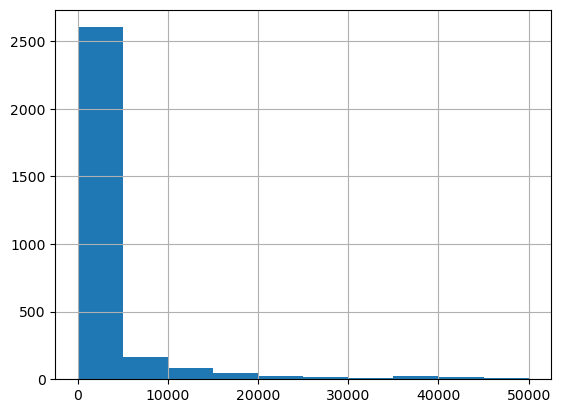

In [22]:
print(map_gdf.MIG_TOT.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
map_gdf.MIG_TOT.hist(range=(0,50000))

## 2.2 Prepare socioeconomic dataframe

In [ ]:
# Filter out columns needed for the socioeconomic pop-up dashboard
mig_cols = ['MIG_TOT', 'MIG_EU', 'MIG_AS', 'MIG_AS_E', 'MIG_AS_SC', 'MIG_AS_SE', 'MIG_AS_W',
            'MIG_AFR',  # 'MIG_AFR_E', 'MIG_AFR_M', 'MIG_AFR_N', 'MIG_AFR_S', 'MIG_AFR_W',
            'MIG_OC', 'MIG_LA', 'MIG_LA_CAR', 'MIG_LA_CAM', 'MIG_LA_CAM_MX', 'MIG_LA_SAM',
            'MIG_NA']
socioec_ECF = totalECF_demo[
    ['FIPS', 'County', 'FIPSTATE', 'State',
     'tonCO2e_eff_avg', 'tonCO2e_eff_peremp_avg', 'tonCO2e_eff_peremp_avg_log10',
     'POP', 'Emp', 'UNEMP_RATE', 'POV_RATE', 'INC_IND_TOT', 'ED_PERCENT_TERTIARY'
     ] + mig_cols
]

# Rename & reformat columns
socioec_ECF['County'] = socioec_ECF['County'].str.capitalize()
socioec_ECF = socioec_ECF.rename(
    columns={
        'County': 'COUNTY',
        'State': 'STATE',
        'tonCO2e_eff_avg': 'TONCO2E',
        'tonCO2e_eff_peremp_avg': 'ECF',
        'tonCO2e_eff_peremp_avg_log10': 'ECF_log10',
        'Emp': 'EMP_TOT'})

# Calculate migrate population percentages percentages
mig_cols.remove('MIG_TOT')
for col in mig_cols:
    socioec_ECF[f'{col}_PERCENT'] = socioec_ECF[col] / socioec_ECF.MIG_TOT * 100
socioec_ECF['MIG_LA_CAM_OTHER_PERCENT'] = socioec_ECF.MIG_LA_CAM_PERCENT - \
    socioec_ECF.MIG_LA_CAM_MX_PERCENT
socioec_ECF = socioec_ECF.drop(columns=mig_cols)

# Pivot sectoral data to give tonCO2e and emp per sector for each county
socioec_ECF_sectoral = sectorECF_demo.pivot(
    index='FIPS',
    columns='sector',
    values=['Emp', 'tonCO2e_eff_avg']
).reset_index()
for sector in sectorECF_demo.sector.unique():
    socioec_ECF_sectoral[f'EMP_{sector}'] = socioec_ECF_sectoral[('Emp', sector)]
    socioec_ECF_sectoral[f'TONCO2E_{sector}'] = socioec_ECF_sectoral[('tonCO2e_eff_avg', sector)]
socioec_ECF_sectoral = socioec_ECF_sectoral.drop(
    columns=['Emp', 'tonCO2e_eff_avg']).droplevel(level=1, axis=1)

# Merge sectoral data onto total county data
socioec_ECF = pd.merge(socioec_ECF, socioec_ECF_sectoral, how='left', on='FIPS')
for sector in sectorECF_demo.sector.unique():
    socioec_ECF[f'EMP_{sector}'] = socioec_ECF.apply(
        lambda x: x[f'EMP_{sector}'] if x[f'EMP_{sector}'] > 0 else
        (x[f'EMP_{sector}'] if x[f'TONCO2E_{sector}'] > 0 else 0),
        axis=1
        )
    socioec_ECF[f'TONCO2E_{sector}'] = socioec_ECF[f'TONCO2E_{sector}'].fillna(0)
    socioec_ECF[f'EMP_{sector.upper()}_PERCENT'] = socioec_ECF[f'EMP_{sector}'] / \
        socioec_ECF.EMP_TOT * 100
    socioec_ECF[f'TONCO2E_{sector.upper()}_PERCENT'] = socioec_ECF[f'TONCO2E_{sector}'] / \
        socioec_ECF.TONCO2E * 100
    socioec_ECF = socioec_ECF.drop(columns=[f'EMP_{sector}', f'TONCO2E_{sector}'])

# Create state and national ECF figures
totalECF_state_demo = totalECF_demo[
    ['FIPSTATE', 'State', 'tonCO2e_eff_avg', 'burden_avg', 'POP', 'Emp']
].groupby(by=['FIPSTATE', 'State'], as_index=False).sum()
totalECF_state_demo['tonCO2e_eff_peremp_avg'] = totalECF_state_demo.tonCO2e_eff_avg / \
    totalECF_state_demo.Emp
totalECF_state_demo['tonCO2e_eff_peremp_avg_log10'] = np.log10(
    totalECF_state_demo['tonCO2e_eff_peremp_avg']
)
mean = np.mean(totalECF_state_demo.tonCO2e_eff_peremp_avg_log10)
std = np.std(totalECF_state_demo.tonCO2e_eff_peremp_avg_log10)
totalECF_state_demo = totalECF_state_demo.rename(
    columns={'tonCO2e_eff_peremp_avg': 'ECF_ST',
             'tonCO2e_eff_peremp_avg_log10': 'ECF_ST_log10'}
)
totalECF_state_demo = totalECF_state_demo[['FIPSTATE', 'ECF_ST', 'ECF_ST_log10']]

totalECF_US = totalECF_demo.tonCO2e_eff_avg.sum() / totalECF_demo.Emp.sum()
totalECF_US_log10 = np.log10(totalECF_US)

# Merge onto total county data
socioec_ECF = pd.merge(socioec_ECF, totalECF_state_demo, how='left', on='FIPSTATE')
socioec_ECF['ECF_US'] = totalECF_US
socioec_ECF['ECF_US_log10'] = totalECF_US_log10


In [ ]:
# Write to CSV
socioec_ECF.to_csv('socioec_ECF.csv')